# Ok, how would you construct a gate you need?

In many algorithms further you will need to impement a controlled gate $CU$, knowing $U$. This should be fast enough (you cannot to matrix transpilation for large matrices) to allow you real time circuit composition. Please pay attention that $U$ may be a multiqubit gate as well.

Phrasing as a programmer, a $CU$ gate should DO something, if condinion is satisfied, and do NOTHING, if not. [Texbooks suggest](https://www.cambridge.org/highereducation/books/quantum-computation-and-quantum-information/01E10196D0A682A6AEFFEA52D53BE9AE#overview) (aslo this paper [has some on this topic](https://arxiv.org/pdf/quant-ph/0406176.pdf)) to seek the decomposition in this form:

$\begin{equation}
    \begin{cases}
      A\times B\times C=I,\\
      e^{i\alpha}A\times X\times B\times X\times C = U
    \end{cases}\
\end{equation}$

or 


$\begin{equation}
    \begin{cases}
      A\times B\times C=I,\\
      e^{i\alpha}A\times Z\times B\times Z\times C = U
    \end{cases}\
\end{equation}$

Depending on your platform's basis gates (CX or CZ).

**Discuss**: 
- Why this is a good way to think of the problem? 
- What might be the form of the solution circuit?
- Do we care of $e^{i\alpha}$?

<details>
    <summary>This is why!</summary>
    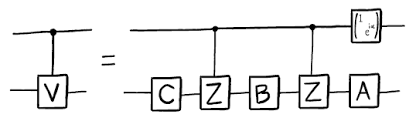
</details>

## Controlled gates IRL

Let us construct a controlled $Y$ (guided) and $RXX(\frac{\pi}{2})$ (yourself).

### CY

Let us stick to the fact, that rotation gates may always satisfy one of the equations above with 3 matrices: $I, \sqrt{U}^\dagger, \sqrt{U}$. $Y$ is a rotation gate, what is $\sqrt{Y}$?

$\ R_y\left ( \theta  \right ) = (i) \begin{pmatrix} \cos \left ( \frac{\theta}{2} \right )  & - \sin \left ( \frac{\theta}{2} \right) \\ \sin \left ( \frac{\theta}{2} \right) & \cos \left ( \frac{\theta}{2} \right ) \end{pmatrix}$

$\ R_y\left ( \pi  \right ) = (i) \begin{pmatrix} \cos \left ( \frac{\pi}{2} \right )  & - \sin \left ( \frac{\pi}{2} \right) \\ \sin \left ( \frac{\pi}{2} \right) & \cos \left ( \frac{\pi}{2} \right ) \end{pmatrix} = (i) \begin{pmatrix} 0  & -1 \\ 1 & 0 \end{pmatrix}$

In [ ]:
from scipy.linalg import sqrtm
import numpy as np

I = np.eye(2)
X = np.array([
    [0, 1], 
    [1, 0]
])
Y = np.array([
    [0., -1.],
    [1.,  0.]
]) * 1j
Y2 = sqrtm(Y)
Y2_dagger = Y2.T.conj() # np.linalg.inv(Y2)
Y2

## Let us validate the second line of the system of equations

In [ ]:
# U = p * A * X * B         * X * C
U =       I @ X @ Y2_dagger @ X @ Y2
# what is the global phase component we miss here?
print(U.round(3))
assert np.allclose(1j * U, Y)

In [ ]:
from qiskit import QuantumCircuit, execute, BasicAer

qc = QuantumCircuit(2, name="CY")

qc.unitary(Y2, 1, label="$\sqrt{Y}$")
# ... todo ...
qc.draw('mpl')

In [ ]:
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.ry(np.pi / 4, 1)
vec = execute(qc2, BasicAer.get_backend('statevector_simulator')).result().get_statevector().round(3)
print(vec)
qc2.draw('mpl')

In [ ]:
qc2.append(qc, [0, 1])
qc2.draw('mpl')

In [ ]:
vec = execute(qc2, BasicAer.get_backend('statevector_simulator')).result().get_statevector().round(3)
print(vec)

In [ ]:
qc3 = QuantumCircuit(2)
qc3.h(0)
qc3.ry(np.pi / 4, 1)
qc3.cy(0, 1)
qc3.draw('mpl')

In [ ]:
vec = execute(qc3, BasicAer.get_backend('statevector_simulator')).result().get_statevector().round(3)
print(vec)

In [ ]:
qc3.decompose().draw()

## ADVANCED: use qiskit to construct and analyse CRXX gate

In [ ]:
from qiskit.quantum_info import Operator

RXX = .5 ** .5 * (np.eye(4) + 1j * np.fliplr(np.eye(4)))
control_rxx = ...
# or 
control_rxx = ...

In [ ]:
from qiskit import transpile
qc = QuantumCircuit(3)

...